In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
import warnings
# Set action = "ignore" to ignore warnings
warnings.filterwarnings(action= 'ignore')
# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules related to this exercise
import tools
from model_dc_multidim import model_dc_multidim
import time

# Solve the Model


In [2]:
print('Baseline Model')
t0 = time.time()  # set the starting time
model0 = model_dc_multidim()
model0.setup()
model0.create_grids()

model0.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time


print('Alternative 1')
t0 = time.time()  # set the starting time
model1 = model_dc_multidim()
model1.setup()
model1.create_grids()
model1.solve(health_cost = True)
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

print('Alternative 2')
t0 = time.time()  # set the starting time
model2 = model_dc_multidim()
model2.setup()
model2.create_grids()
model2.solve(health_cost = True, health_gains = True)
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

Baseline Model
Evaluating period: 68
Evaluating period: 67
Evaluating period: 66
Evaluating period: 65
Evaluating period: 64
Evaluating period: 63
Evaluating period: 62
Evaluating period: 61
Evaluating period: 60
Evaluating period: 59
Evaluating period: 58
Evaluating period: 57
Evaluating period: 56
Evaluating period: 55
Evaluating period: 54
Evaluating period: 53
Evaluating period: 52
Evaluating period: 51
Evaluating period: 50
Evaluating period: 49
Evaluating period: 48
Evaluating period: 47
Evaluating period: 46
Evaluating period: 45
Evaluating period: 44
Evaluating period: 43
Evaluating period: 42
Evaluating period: 41
Evaluating period: 40
Evaluating period: 39
Evaluating period: 38
Evaluating period: 37
Evaluating period: 36
Evaluating period: 35
Evaluating period: 34
Evaluating period: 33
Evaluating period: 32
Evaluating period: 31
Evaluating period: 30
Evaluating period: 29
Evaluating period: 28
Evaluating period: 27
Evaluating period: 26
Evaluating period: 25
Evaluating period

# Run simulations

In [3]:
sim0 = model0.simulate()
sim1 =model1.simulate(health_cost = True)
sim2 =model2.simulate( health_cost = True, health_gains = True)
#np.average(sim2.h[:,:])- np.average(sim1.h[:,:])

# Plot the simulations

In [4]:

def modelcurves(Vars, range_, label, model, b=False):
    '''
    Find averages af model values
    args:
        models (list): list of model simulations
    return Model values
    '''
    
    # containers
    base =[]
    alt1 = []
    alt2 = []
    
    #loop over simulation results
    for i in range(len(Vars)):
        # loop over years
        for j in range(range_):
            val = Vars[i][j, :] 
            val = np.average(val)
            if i == 0:
                base.append(val) # store values from first model
            elif i == 1:
                alt1.append(val) # store values from secound model
            elif i == 2:
                alt2.append(val) # store values from third model
            else:
                print('no list available') # øv
                
                
    fig = plt.figure(figsize=(8,6))
    fig.tight_layout()
    ax = fig.add_subplot(111)
    x= range(25,25+range_)
    if len(Vars) == 1:
        ax.plot(x,base, color ='blue') # plot base
    else:
        # create arrays
        basearray = np.array(base)
        alt1array = np.array(alt1)
        alt2array = np.array(alt2)
        # get difference
        delta1 = np.subtract(base, alt1array)
        delta2 = np.subtract(base, alt2array)
        # difference to lists
        subtracted1 = list(delta1)
        subtracted2 = list(delta2)
        
        #plot simulations and differences
        ax.plot(x,base,color ='blue')
        ax.plot(x,alt1, ':', color = 'green')
        ax.plot(x,alt2,'--', color = 'coral')
        ax.bar(x,height = subtracted1, color = 'green')
        ax.bar(x,height = subtracted2,color = 'coral')
    
    # create title
    ax.set_ylim(top=max(base)+max(base)*0.05 )
    ax.set_xticks([x for x in range(20,91,10)], minor=True)
    ax.set_yticks(np.linspace(0,0.8,5), minor=True)
    
    ax.set_clip_on(False)
    
    ax.set_ylabel(label)
    ax.set_xlabel('age')
    ax.margins(x=0.02,)
    ax.margins(y=0.0)
    ax.set_xticks([x for x in range(25,95,10)], minor=True)
    ax.set_yticks(np.linspace(0,1,10), minor=True)
    ax.set_clip_on(False)
    #plt.title(label, fontsize=15, fontweight='bold')
    legend = plt.legend(model, frameon = 1, prop={'size': 14}, loc='lower left')
    frame = legend.get_frame()
    frame.set_color('white')
    frame.set_edgecolor('grey')

    
    if b ==True:
        label =f'{label}_baseline'
    elif b == 'sim':
        label =f'{label}_sim'
        
    elif b == 'sim2':
        label =f'{label}_sim2'
        ax.set_ylim(top=max(base)+max(base)*0.1 )
    fig_name = label.replace(' ','_') 
    plt.savefig(f'{fig_name}_figure.png')
    plt.show()

 

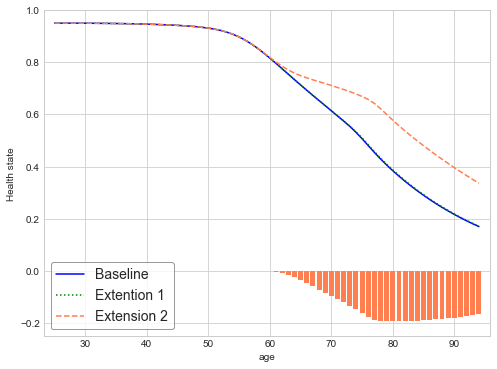

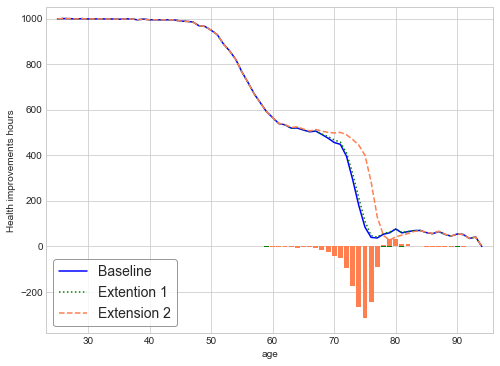

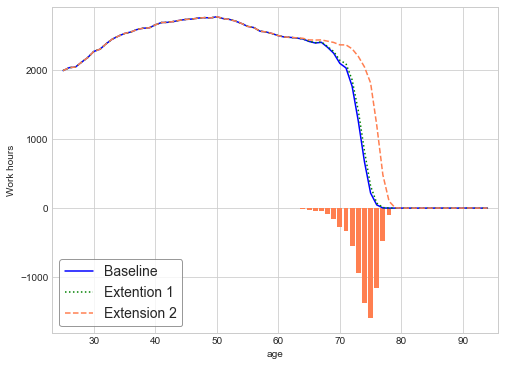

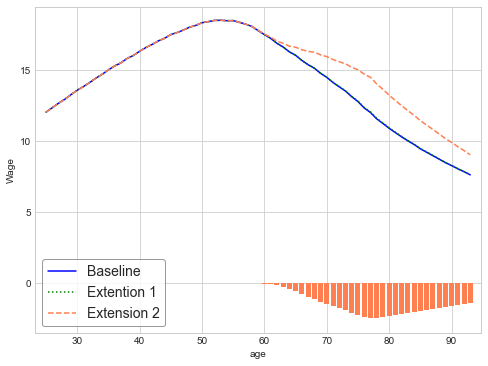

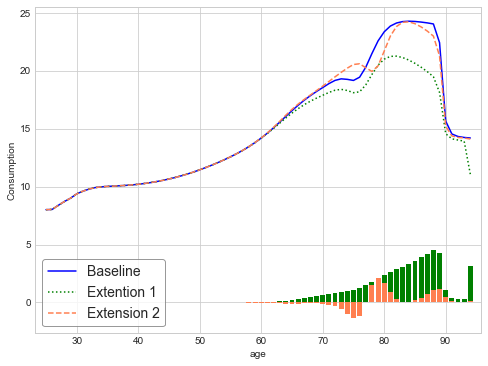

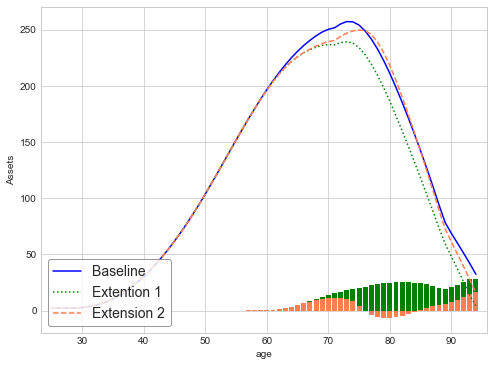

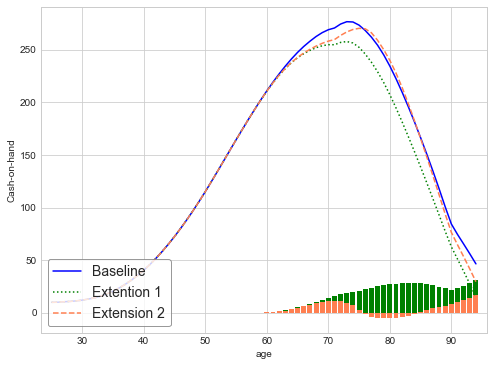

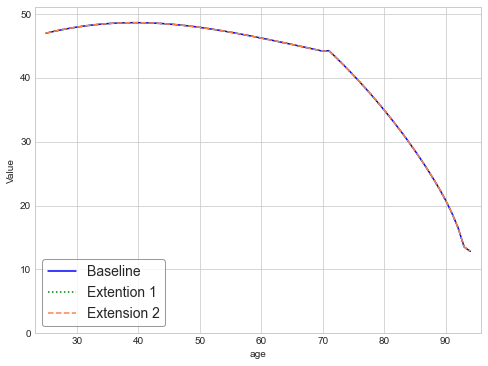

In [5]:

Varsh = [sim0.h,sim1.h, sim2.h]

modelcurves(Varsh, 70, 'Health state', ["Baseline","Extention 1","Extension 2"]) # Health



VarsTH = [sim0.Th,sim1.Th, sim2.Th]

modelcurves(VarsTH, 70, 'Health improvements hours', ["Baseline","Extention 1","Extension 2"]) # Time on Health


VarsTW = [sim0.Tw,sim1.Tw, sim2.Tw]

modelcurves(VarsTW, 70, 'Work hours', ["Baseline","Extention 1","Extension 2"]) # Time on work



Varsw = [sim0.wage,sim1.wage, sim2.wage]

modelcurves(Varsw, 70, 'Wage', ["Baseline","Extention 1","Extension 2"]) # Wage



Varc = [sim0.c,sim1.c, sim2.c]

modelcurves(Varc, 70, 'Consumption', ["Baseline","Extention 1","Extension 2"]) # consumption


Varsa = [sim0.a,sim1.a, sim2.a]

modelcurves(Varsa, 70, 'Assets',["Baseline","Extention 1","Extension 2"]) # Assets


Varsa = [sim0.m,sim1.m, sim2.m]

modelcurves(Varsa, 70, 'Cash-on-hand', ["Baseline","Extention 1","Extension 2"]) # Cash-on-hand



Varsv = [model0.sol.v,model1.sol.v, model2.sol.v]

modelcurves(Varsv, 70, 'Value', ["Baseline","Extention 1","Extension 2"]) # Value

# Plot the baseline only


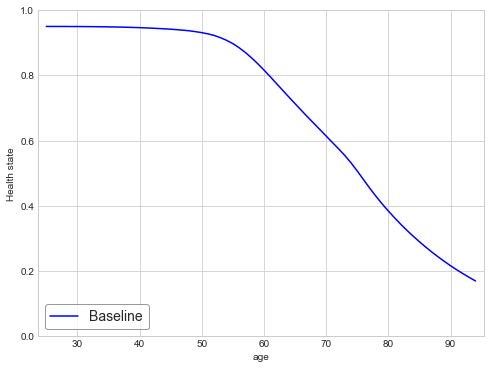

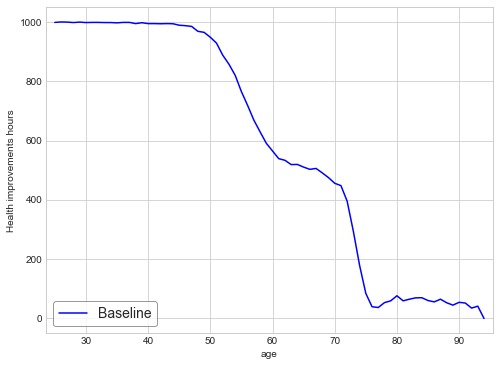

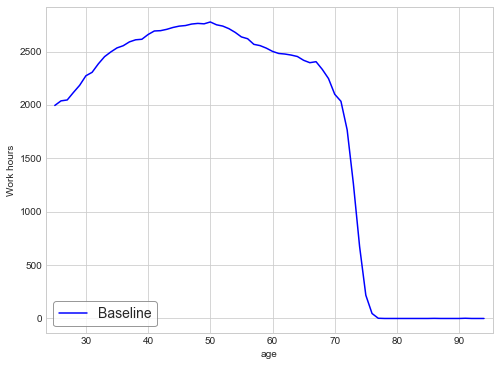

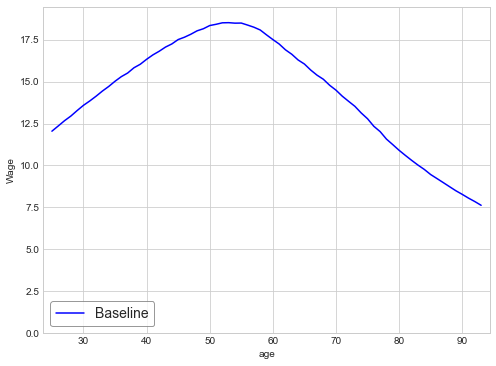

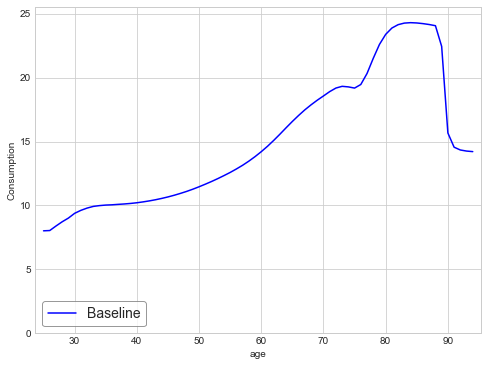

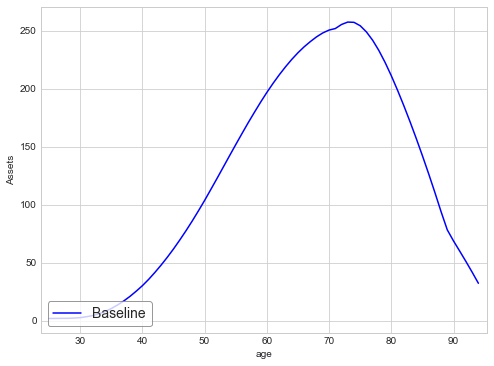

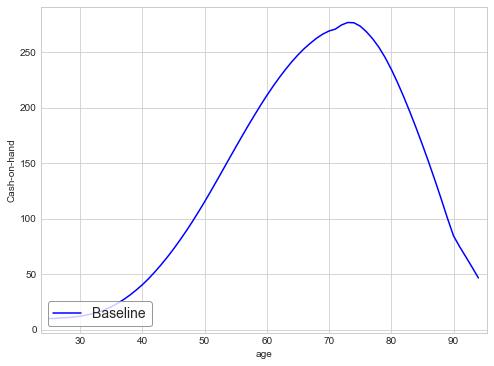

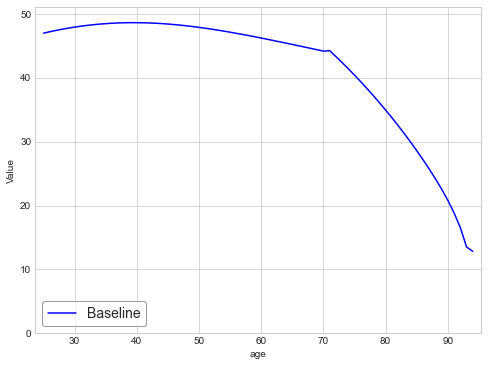

In [6]:

Varsh = [sim0.h]

modelcurves(Varsh, 70, 'Health state',["Baseline","Extention 1","Extension 2"],b =True) # Health



VarsTH = [sim0.Th]

modelcurves(VarsTH, 70, 'Health improvements hours',["Baseline","Extention 1","Extension 2"],b =True) # Time on Health


VarsTW = [sim0.Tw]

modelcurves(VarsTW, 70, 'Work hours',["Baseline","Extention 1","Extension 2"],b =True) # Time on work



Varsw = [sim0.wage]

modelcurves(Varsw, 70, 'Wage',["Baseline","Extention 1","Extension 2"],b =True) # Wage



Varc = [sim0.c]

modelcurves(Varc, 70, 'Consumption',["Baseline","Extention 1","Extension 2"],b =True) # consumption


Varsa = [sim0.a]

modelcurves(Varsa, 70, 'Assets',["Baseline","Extention 1","Extension 2"],b =True) # Assets


Varsa = [sim0.m]

modelcurves(Varsa, 70, 'Cash-on-hand',["Baseline","Extention 1","Extension 2"],b =True) # Cash-on-hand



Varsv = [model0.sol.v]

modelcurves(Varsv, 70, 'Value',["Baseline","Extention 1","Extension 2"],b =True) # Value

# Plot the relative effects

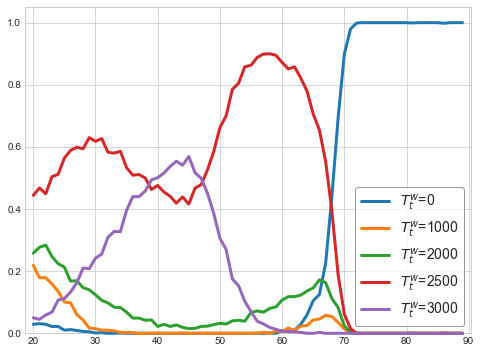

In [7]:

frac_dict = {} # dict for each uniqueu work-hour-supply choice

for bundle in model0.par.T_boundles:
    h, w = bundle
    frac_dict[w] = [0 for x in range(70)] # init list such that we still plot even if fraction is 0
    
for i in range(70):
    u, s = np.unique(sim0.Tw[i, :], return_counts = True)

    for j, val_ in enumerate(u):
        frac_dict[val_][i] = (s[j] / 1000)
            
#print(kek)
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
ax = fig.add_subplot(111)
for key, item in frac_dict.items():
    plt.margins(x=0.02,)
    plt.margins(y=0.0)
    ax.plot(list(range(20,90)), item, alpha = 1, linewidth = 3, zorder=10, clip_on=False)
    #print(line)
    
    ax.set_xticks([x for x in range(20,91,10)], minor=True)
    ax.set_yticks(np.linspace(0,0.8,5), minor=True)
    ax.set_clip_on(False)
    #ax.grid(visible = False, which = "major")
    #ax.grid(visible = True, which = "minor")
    
legend = plt.legend(["$T^w_t$=0","$T^w_t$=1000","$T^w_t$=2000","$T^w_t$=2500","$T^w_t$=3000"], frameon = 1, loc=0, prop={'size': 14})
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('grey')
ax.set_ylim(top=1.05 )
plt.savefig(f'Relative_work_choice.png')
#frame1 = ax.get_frame()

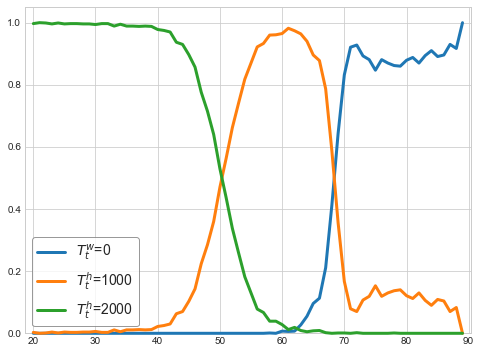

In [8]:


frac_dict = {} # dict for each uniqueu work-hour-supply choice
for bundle in model0.par.T_boundles:
    h, w = bundle
    frac_dict[h] = [0 for x in range(70)] # init list such that we still plot even if fraction is 0
    
for i in range(70):
    u, s = np.unique(sim0.Th[i, :], return_counts = True)

    for j, val_ in enumerate(u):
        frac_dict[val_][i] = (s[j] / 1000)
            
#print(kek)
fig = plt.figure(figsize=(8,6))
fig.tight_layout()
ax = fig.add_subplot(111)
for key, item in frac_dict.items():
    plt.margins(x=0.02,)
    plt.margins(y=0.0)
    ax.plot(list(range(20,90)), item, alpha = 1, linewidth = 3, zorder=10, clip_on=False)
    #print(line)
    
    ax.set_xticks([x for x in range(20,91,10)], minor=True)
    ax.set_yticks(np.linspace(0,0.8,5), minor=True)
    ax.set_clip_on(False)
    #ax.grid(visible = False, which = "major")
    #ax.grid(visible = True, which = "minor")
    
legend = plt.legend(["$T^w_t$=0","$T^h_t$=1000","$T^h_t$=2000","$T^h_t$=3000"], frameon = 1, loc=0, prop={'size': 14})
frame = legend.get_frame()
frame.set_color('white')
frame.set_edgecolor('grey')
ax.set_ylim(top=1.05 )
plt.savefig(f'Relative_health_choice.png')
#frame1 = ax.get_frame()

In [13]:
print('Alternative 3')
t0 = time.time()  # set the starting time
model3 = model_dc_multidim()
model3.setup()
model3.create_grids()
model3.par.my = 0.04
model3.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

print('Alternative 4')
t0 = time.time()  # set the starting time
model4 = model_dc_multidim()
model4.setup()
model4.create_grids()
model4.par.my = 0.06
model4.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time


Alternative 3
Evaluating period: 68
Evaluating period: 67
Evaluating period: 66
Evaluating period: 65
Evaluating period: 64
Evaluating period: 63
Evaluating period: 62
Evaluating period: 61
Evaluating period: 60
Evaluating period: 59
Evaluating period: 58
Evaluating period: 57
Evaluating period: 56
Evaluating period: 55
Evaluating period: 54
Evaluating period: 53
Evaluating period: 52
Evaluating period: 51
Evaluating period: 50
Evaluating period: 49
Evaluating period: 48
Evaluating period: 47
Evaluating period: 46
Evaluating period: 45
Evaluating period: 44
Evaluating period: 43
Evaluating period: 42
Evaluating period: 41
Evaluating period: 40
Evaluating period: 39
Evaluating period: 38
Evaluating period: 37
Evaluating period: 36
Evaluating period: 35
Evaluating period: 34
Evaluating period: 33
Evaluating period: 32
Evaluating period: 31
Evaluating period: 30
Evaluating period: 29
Evaluating period: 28
Evaluating period: 27
Evaluating period: 26
Evaluating period: 25
Evaluating period:

In [14]:
sim3 =model3.simulate(model3)
sim4 =model4.simulate(model4)

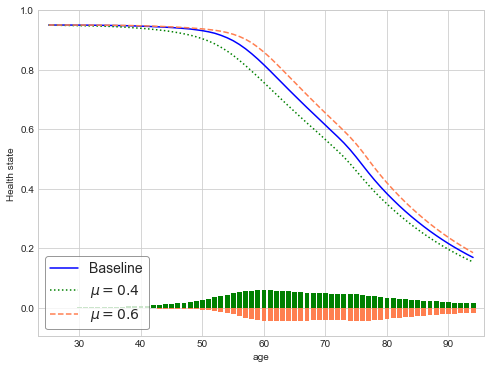

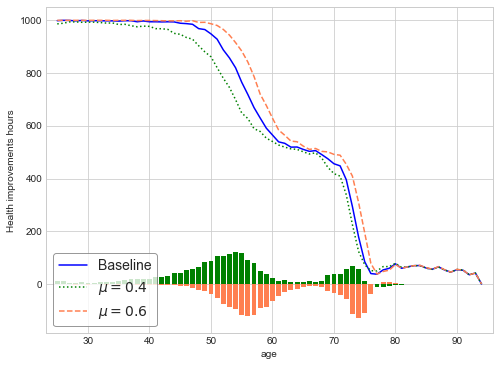

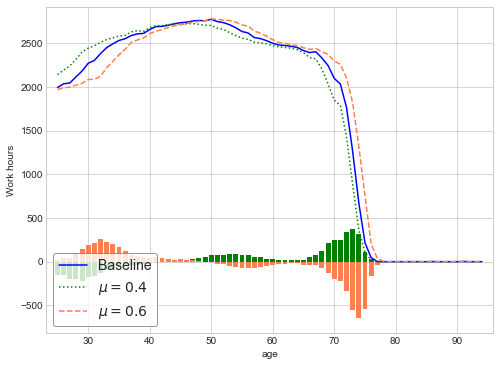

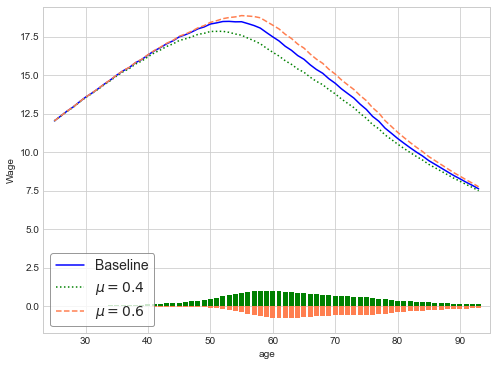

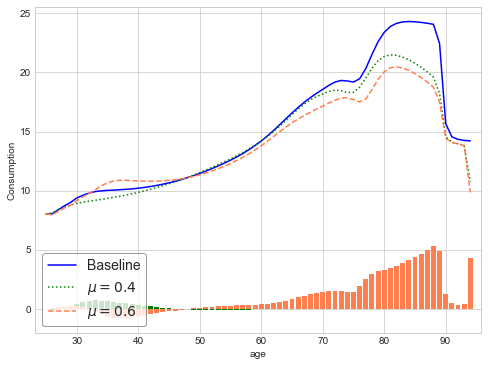

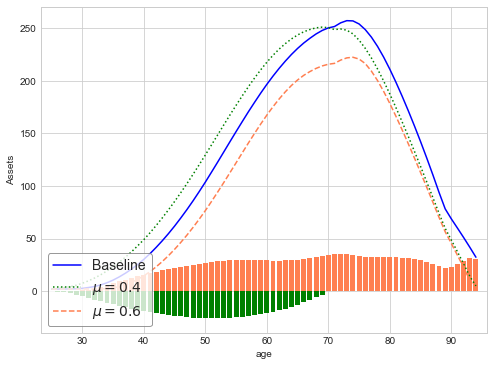

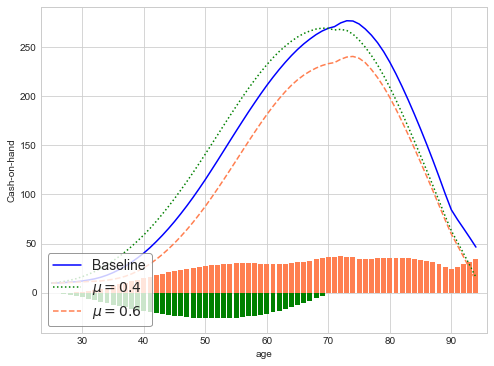

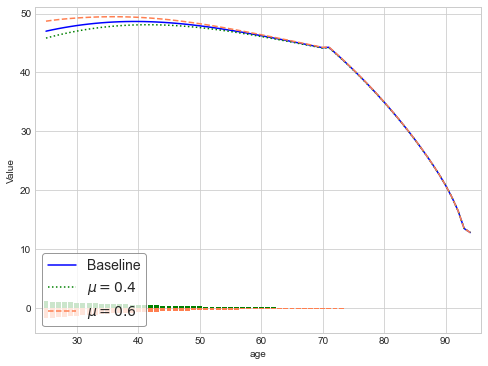

In [15]:

Varsh = [sim0.h,sim3.h, sim4.h]

modelcurves(Varsh, 70, 'Health state',["Baseline", r"$\mu =0.4$", r"$\mu =0.6$"], b='sim') # Health



VarsTH = [sim0.Th,sim3.Th, sim4.Th]

modelcurves(VarsTH, 70, 'Health improvements hours', ["Baseline",r"$\mu =0.4$", r"$\mu =0.6$"], b='sim') # Time on Health


VarsTW = [sim0.Tw,sim3.Tw, sim4.Tw]

modelcurves(VarsTW, 70, 'Work hours', ["Baseline",r"$\mu =0.4$", r"$\mu =0.6$"], b='sim') # Time on work



Varsw = [sim0.wage,sim3.wage, sim4.wage]

modelcurves(Varsw, 70, 'Wage', ["Baseline",r"$\mu =0.4$", r"$\mu=0.6$"], b='sim') # Wage



Varc = [sim0.c,sim3.c, sim4.c]

modelcurves(Varc, 70, 'Consumption', ["Baseline",r"$\mu =0.4$", r"$\mu=0.6$"], b='sim') # consumption


Varsa = [sim0.a,sim3.a, sim4.a]

modelcurves(Varsa, 70, 'Assets', ["Baseline",r"$\mu =0.4$", r"$\mu=0.6$"], b='sim') # Assets


Varsa = [sim0.m,sim3.m, sim4.m]

modelcurves(Varsa, 70, 'Cash-on-hand', ["Baseline",r"$\mu =0.4$", r"$\mu=0.6$"], b='sim') # Cash-on-hand



Varsv = [model0.sol.v,model3.sol.v, model4.sol.v]

modelcurves(Varsv, 70, 'Value', ["Baseline",r"$\mu =0.4$", r"$\mu=0.6$"]) # Value

In [16]:
print('Alternative 5')
t0 = time.time()  # set the starting time
model5 = model_dc_multidim()
model5.setup()
model5.create_grids()
model5.par.phi1= 0.04
model5.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time

print('Alternative 4')
t0 = time.time()  # set the starting time
model6 = model_dc_multidim()
model6.setup()
model6.create_grids()
model6.par.phi1 = 0.06
model6.solve()
t1 = time.time() # set the ending time
print(f'time: {t1-t0:.8} seconds') # print the total time


Alternative 5
Evaluating period: 68
Evaluating period: 67
Evaluating period: 66
Evaluating period: 65
Evaluating period: 64
Evaluating period: 63
Evaluating period: 62
Evaluating period: 61
Evaluating period: 60
Evaluating period: 59
Evaluating period: 58
Evaluating period: 57
Evaluating period: 56
Evaluating period: 55
Evaluating period: 54
Evaluating period: 53
Evaluating period: 52
Evaluating period: 51
Evaluating period: 50
Evaluating period: 49
Evaluating period: 48
Evaluating period: 47
Evaluating period: 46
Evaluating period: 45
Evaluating period: 44
Evaluating period: 43
Evaluating period: 42
Evaluating period: 41
Evaluating period: 40
Evaluating period: 39
Evaluating period: 38
Evaluating period: 37
Evaluating period: 36
Evaluating period: 35
Evaluating period: 34
Evaluating period: 33
Evaluating period: 32
Evaluating period: 31
Evaluating period: 30
Evaluating period: 29
Evaluating period: 28
Evaluating period: 27
Evaluating period: 26
Evaluating period: 25
Evaluating period:

In [17]:
sim5 =model5.simulate(model5)
sim6 =model6.simulate(model6)


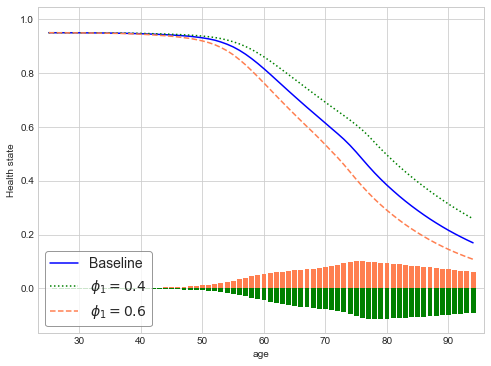

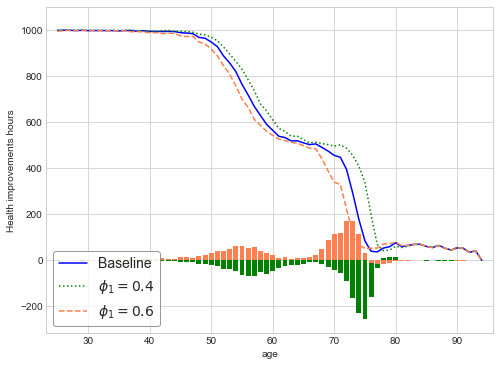

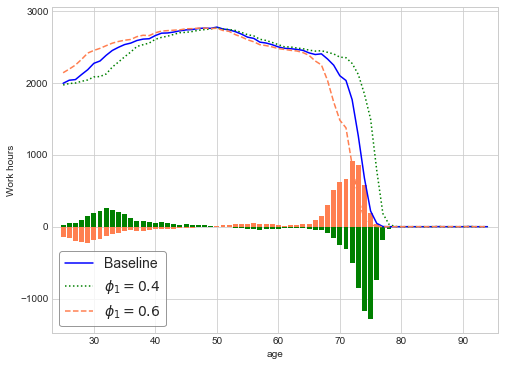

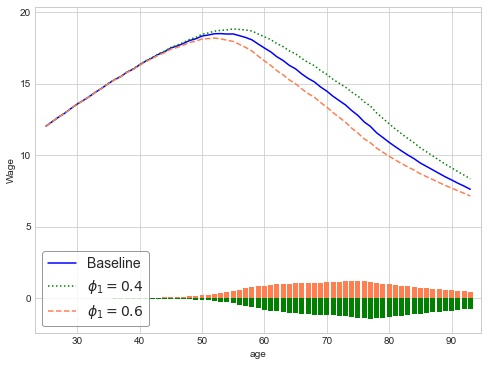

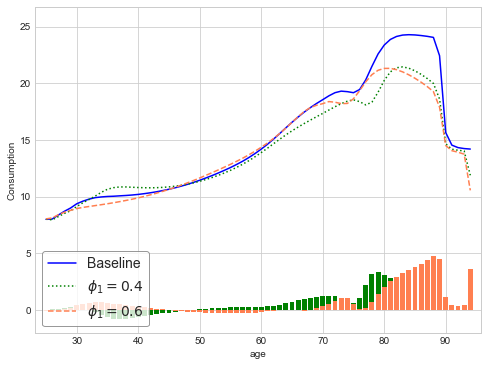

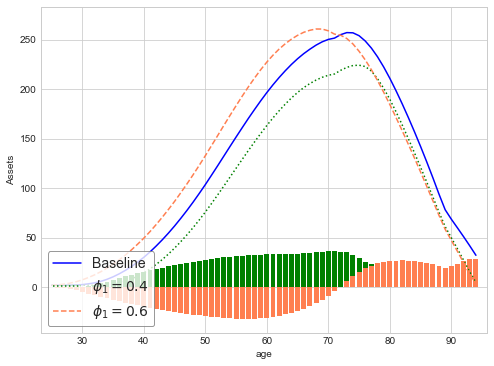

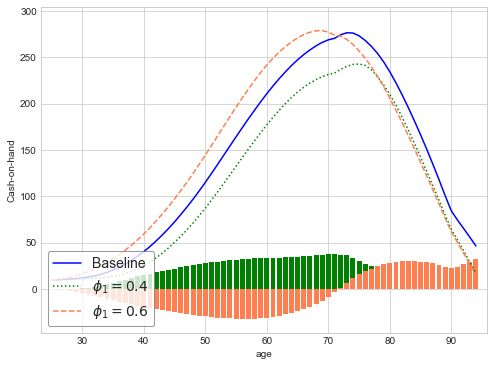

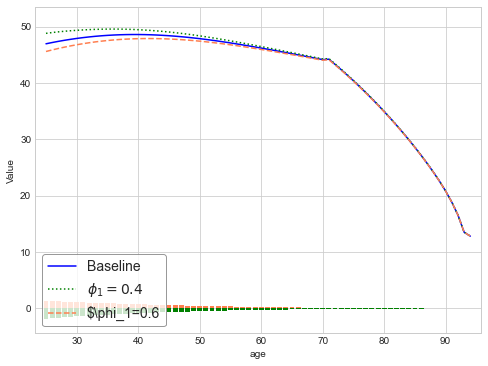

In [18]:
Varsh = [sim0.h,sim5.h, sim6.h]

modelcurves(Varsh, 70, 'Health state', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"],b='sim2') # Health



VarsTH = [sim0.Th,sim5.Th, sim6.Th]

modelcurves(VarsTH, 70, 'Health improvements hours', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"],b='sim2') # Time on Health


VarsTW = [sim0.Tw,sim5.Tw, sim6.Tw]

modelcurves(VarsTW, 70, 'Work hours', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"], b='sim2') # Time on work



Varsw = [sim0.wage,sim5.wage, sim6.wage]

modelcurves(Varsw, 70, 'Wage', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"], b='sim2') # Wage



Varc = [sim0.c,sim5.c, sim6.c]

modelcurves(Varc, 70, 'Consumption', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"], b='sim2') # consumption


Varsa = [sim0.a,sim5.a, sim6.a]

modelcurves(Varsa, 70, 'Assets', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6$"],  b='sim2') # Assets


Varsa = [sim0.m,sim5.m, sim6.m]

modelcurves(Varsa, 70, 'Cash-on-hand', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6 $"], b='sim2') # Cash-on-hand



Varsv = [model0.sol.v,model5.sol.v, model6.sol.v]

modelcurves(Varsv, 70, 'Value', ["Baseline","$\phi_1 =0.4$","$\phi_1=0.6"],  b='sim2') # Value